In [28]:
import pandas as pd
import numpy as np
import csv as csv

from time import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline

In [29]:
train = pd.read_csv('HAPT_Data_Set/Train/X_train.txt', header=None, delim_whitespace=True);

#print train.head(3)

#adding delta features
for i in range(0, 560):    
    train[i+560] = train[i].diff();
    train[i+560][0] = 0;

#load labels
labels = pd.read_csv('HAPT_Data_Set/features.txt', header=None);

#add delta labels
for i in range(0, 560):
    labels[0][i+560] = 'delta' + labels[0][i];

#assign labels
train.columns = labels[0];

In [30]:
#example of training data
train.head(3)

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,deltafBodyGyroJerkMag-MaxInds-1,deltafBodyGyroJerkMag-MeanFreq-1,deltafBodyGyroJerkMag-Skewness-1,deltafBodyGyroJerkMag-Kurtosis-1,deltatBodyAcc-AngleWRTGravity-1,deltatBodyAccJerk-AngleWRTGravity-1,deltatBodyGyro-AngleWRTGravity-1,deltatBodyGyroJerk-AngleWRTGravity-1,deltatXAxisAcc-AngleWRTGravity-1,deltatYAxisAcc-AngleWRTGravity-1
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.000000,0.215040,-0.288351,-0.147369,0.166231,-0.037835,-0.267865,0.721956,-0.003534,0.000348
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.444444,0.237276,0.198772,0.098830,-0.172036,0.185334,0.833325,0.105018,-0.004138,0.000348


In [31]:
trainTarget = pd.read_csv('HAPT_Data_Set/Train/y_train.txt', header=None);

In [32]:
trainTarget.head(2)

,0
0,5
1,5


In [33]:
random_forest = RandomForestClassifier(n_estimators=300, n_jobs=-1);

start = time();
random_forest.fit(train, trainTarget[0]);
print("RandomForest train time %.2f" % (time() - start));

start = time();
train_pred = cross_val_predict(random_forest, train, trainTarget[0], cv=4);
print("RandomForest cross-validation time %.2f" % (time() - start));

print "Accuracy: ", accuracy_score(trainTarget[0], train_pred);

RandomForest train time 22.67
RandomForest cross-validation time 62.98
Accuracy:  0.909488863139


In [34]:
logistic_regression = LogisticRegression(penalty='l1', dual=False);

start = time();
logistic_regression.fit(train, trainTarget[0]);
print("Logistic Regression train time %.2f" % (time() - start));

start = time();
logistic_pred = cross_val_predict(logistic_regression, train, trainTarget[0], cv=4);
print("Logistic Regression cross-validation time %.2f" % (time() - start));

print "Accuracy: ", accuracy_score(trainTarget[0], logistic_pred);

Logistic Regression train time 16.04
Logistic Regression cross-validation time 36.19
Accuracy:  0.937685077894


In [35]:
svm_classifier = LinearSVC();

start = time();
svm_classifier.fit(train, trainTarget[0]);
print("Support Vector Machine train time %.2f" % (time() - start));

start = time();
svm_pred = cross_val_predict(svm_classifier, train, trainTarget[0], cv=4);
print("Support Vector Machine cross-validation time %.2f" % (time() - start));

print "Accuracy: ", accuracy_score(trainTarget[0], svm_pred);

Support Vector Machine train time 12.83
Support Vector Machine cross-validation time 41.04
Accuracy:  0.9340800824


In [36]:
knn_classifier = KNeighborsClassifier();

start = time();
knn_classifier.fit(train, trainTarget[0]);
print("KNN Training train time %.2f" % (time() - start));

start = time();
knn_pred = cross_val_predict(knn_classifier, train, trainTarget[0], cv=4);
print("KNN Evaluation cross-validation time %.2f" % (time() - start));

print "Accuracy: ", accuracy_score(trainTarget[0], knn_pred);

KNN Training train time 0.53
KNN Evaluation cross-validation time 96.42
Accuracy:  0.863267670915


In [37]:
#support vector machine results
correct = np.zeros(13);
incorrect = np.zeros(13);

for i in range(svm_pred.size):
    if svm_pred[i] == trainTarget[0][i]:
        correct[trainTarget[0][i]]+=1;
    else:
        incorrect[trainTarget[0][i]]+=1;

titles = pd.read_csv('HAPT_Data_Set/activity_labels.txt', header=None, delim_whitespace=True);

for i in range(1, 13):
    print titles[1][i-1], correct[i]/(correct[i]+incorrect[i]);
    

WALKING 0.938825448613
WALKING_UPSTAIRS 0.919850885368
WALKING_DOWNSTAIRS 0.954407294833
SITTING 0.938901778809
STANDING 0.917076598735
LAYING 0.990799716914
STAND_TO_SIT 0.765957446809
SIT_TO_STAND 0.869565217391
SIT_TO_LIE 0.706666666667
LIE_TO_SIT 0.783333333333
STAND_TO_LIE 0.722222222222
LIE_TO_STAND 0.614035087719


In [48]:
#logistic_regression results
correct = np.zeros(13);
incorrect = np.zeros(13);

for i in range(logistic_pred.size):
    if logistic_pred[i] == trainTarget[0][i]:
        correct[trainTarget[0][i]]+=1;
    else:
        incorrect[trainTarget[0][i]]+=1;

titles = pd.read_csv('HAPT_Data_Set/activity_labels.txt', header=None, delim_whitespace=True);

for i in range(1, 13):
    print titles[1][i-1], correct[i]/(correct[i]+incorrect[i]);
    

WALKING 0.938009787928
WALKING_UPSTAIRS 0.91798695247
WALKING_DOWNSTAIRS 0.961499493414
SITTING 0.933488012374
STANDING 0.933239634575
LAYING 0.997876857749
STAND_TO_SIT 0.829787234043
SIT_TO_STAND 0.869565217391
SIT_TO_LIE 0.706666666667
LIE_TO_SIT 0.7
STAND_TO_LIE 0.711111111111
LIE_TO_STAND 0.631578947368


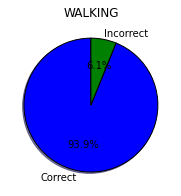

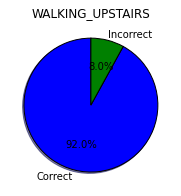

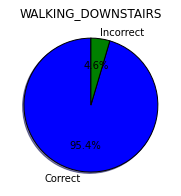

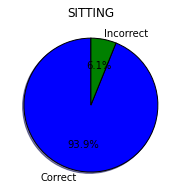

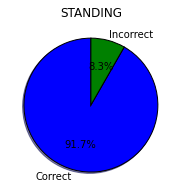

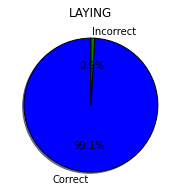

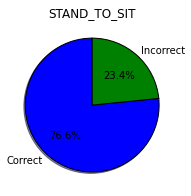

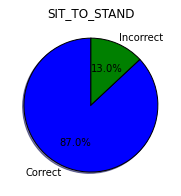

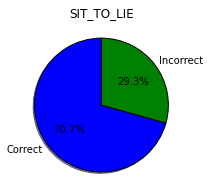

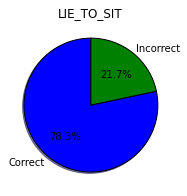

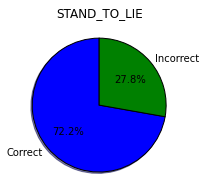

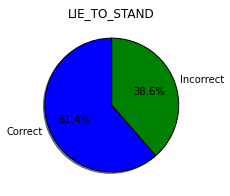

In [38]:
the_grid = GridSpec(4, 6);


for i in range(1,13):
    figure(i, figsize=(3,3));
    # The slices will be ordered and plotted counter-clockwise.
    labels = 'Correct', 'Incorrect'
    fracs = [ correct[i], incorrect[i]];

    pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90);

    title(titles[1][i-1]);


show();

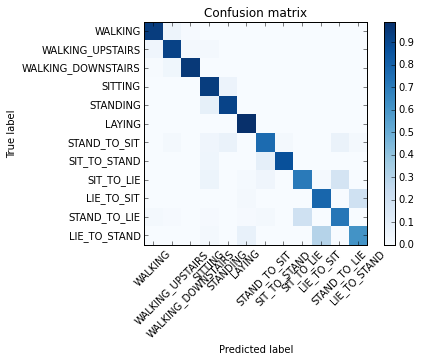

In [39]:
#adapted from scikit-learn confusion matrix example
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(titles[1]))
    plt.xticks(tick_marks, titles[1], rotation=45)
    plt.yticks(tick_marks, titles[1])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
cm = confusion_matrix(trainTarget[0], svm_pred)
np.set_printoptions(precision=2)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis];
plt.figure()
plot_confusion_matrix(cm)

In [40]:
#now running on the test data for final results

In [41]:
test = pd.read_csv('HAPT_Data_Set/Test/X_test.txt', header=None, delim_whitespace=True);

#print train.head(3)

#adding delta features
for i in range(0, 560):    
    test[i+560] = test[i].diff();
    test[i+560][0] = 0;

#load labels
labels = pd.read_csv('HAPT_Data_Set/features.txt', header=None);

#add delta labels
for i in range(0, 560):
    labels[0][i+560] = 'delta' + labels[0][i];

#assign labels
test.columns = labels[0];

In [42]:
testTarget = pd.read_csv('HAPT_Data_Set/Test/y_test.txt', header=None);

In [43]:
random_forest_result = random_forest.predict(test);
print "Accuracy: ", accuracy_score(random_forest_result, testTarget);

Accuracy:  0.918089816572


In [44]:
logistic_regression_result = logistic_regression.predict(test);
print "Accuracy: ", accuracy_score(logistic_regression_result, testTarget);

Accuracy:  0.952877925364


In [45]:
svm_classifier_result = svm_classifier.predict(test);
print "Accuracy: ", accuracy_score(svm_classifier_result, testTarget);

Accuracy:  0.954459203036


In [46]:
knn_classifier_result = knn_classifier.predict(test);
print "Accuracy: ", accuracy_score(knn_classifier_result, testTarget);

Accuracy:  0.84155597723
